In [1]:
%load_ext autoreload
%autoreload 2
# %pip install matplotlib
# %pip install cvxpy
# %pip install mosek

In [2]:
import mpc
import matplotlib.pyplot as plt
import numpy as np
import tqdm


importing qpsolvers...
Available solvers: ['clarabel', 'cvxopt', 'daqp', 'ecos', 'highs', 'mosek', 'osqp', 'piqp', 'proxqp', 'qpalm', 'quadprog', 'scs']
ok


In [3]:
horizon = 8
t = 0.1

u = mpc.newMPC(
    np.array([10000, 0, 0, 0, 0, 0]), np.array([0, 0, 0, 0, 0, 0]), horizon=horizon, t=t
)
XH = mpc.get_XH(horizon, t=t)
u

Solution found!


/home/ekter/Documents/python/.venv/lib/python3.12/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 1.00000000e+04, -1.78036736e-20, -6.78617964e-17, -1.03002035e-21,
       -4.87855664e-21, -1.77503076e-19, -8.62309055e-03, -8.30385743e-03,
        2.03895594e-01,  2.03772925e-01, -1.11973876e-01, -1.12120419e-01,
       -2.53454655e-01, -2.53600116e-01, -3.46962264e-01, -3.47107712e-01,
       -4.89473955e-01, -4.89619411e-01, -4.99998102e+00, -4.99998094e+00,
       -4.98051428e+00, -4.98113618e+00,  1.00000000e+00])

In [4]:
XH@u

array([ 9.99999964e+03,  4.34700951e-03,  6.66921750e-03,  4.58833701e-02,
       -3.19233127e-07, -3.19233127e-06,  1.00000000e+00,  1.00000085e+04,
       -1.04779995e-01, -1.59954475e-01, -2.81115714e+00,  9.07456573e-08,
       -1.96564157e-06,  1.00000000e+00,  9.99999615e+03,  5.97149048e-02,
        7.22977048e-02, -3.72547328e+00,  1.55617804e-07, -5.00209180e-07,
        1.00000000e+00,  9.99998897e+03,  1.27159398e-01,  2.07009350e-01,
       -3.41629796e+00,  1.61022399e-07,  9.54397010e-07,  1.00000000e+00,
        9.99998432e+03,  1.77136696e-01,  2.94164506e-01, -1.47473738e+00,
        1.61550731e-07,  2.40888192e-06,  1.00000000e+00,  9.99997787e+03,
        2.49873646e-01,  4.15179237e-01,  2.82675451e+00,  1.61610227e-07,
        3.86343346e-06,  1.00000000e+00,  9.99978779e+03,  2.56584969e+00,
        3.98150294e+00, -1.17525936e-01,  1.60895331e-08,  3.86271856e-06,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

array([[-0.00862309, -0.00830386],
       [ 0.20389559,  0.20377292],
       [-0.11197388, -0.11212042],
       [-0.25345466, -0.25360012],
       [-0.34696226, -0.34710771],
       [-0.48947396, -0.48961941],
       [-4.99998102, -4.99998094],
       [-4.98051428, -4.98113618]])

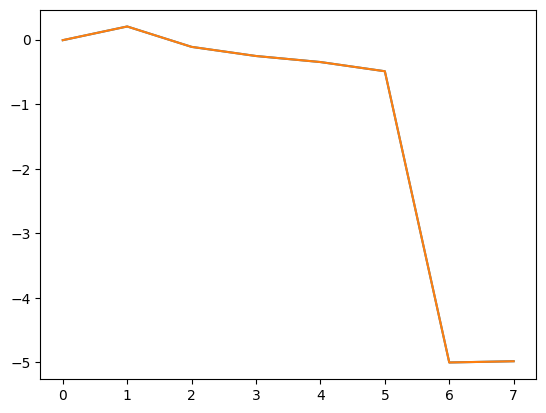

In [5]:
u_inputs = u[6:-1].reshape((-1,2))
plt.plot(u_inputs)
u_inputs

In [6]:
x_states = (XH@u).reshape((-1,7))[:, 0:6]
x_states


array([[ 9.99999964e+03,  4.34700951e-03,  6.66921750e-03,
         4.58833701e-02, -3.19233127e-07, -3.19233127e-06],
       [ 1.00000085e+04, -1.04779995e-01, -1.59954475e-01,
        -2.81115714e+00,  9.07456573e-08, -1.96564157e-06],
       [ 9.99999615e+03,  5.97149048e-02,  7.22977048e-02,
        -3.72547328e+00,  1.55617804e-07, -5.00209180e-07],
       [ 9.99998897e+03,  1.27159398e-01,  2.07009350e-01,
        -3.41629796e+00,  1.61022399e-07,  9.54397010e-07],
       [ 9.99998432e+03,  1.77136696e-01,  2.94164506e-01,
        -1.47473738e+00,  1.61550731e-07,  2.40888192e-06],
       [ 9.99997787e+03,  2.49873646e-01,  4.15179237e-01,
         2.82675451e+00,  1.61610227e-07,  3.86343346e-06],
       [ 9.99978779e+03,  2.56584969e+00,  3.98150294e+00,
        -1.17525936e-01,  1.60895331e-08,  3.86271856e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

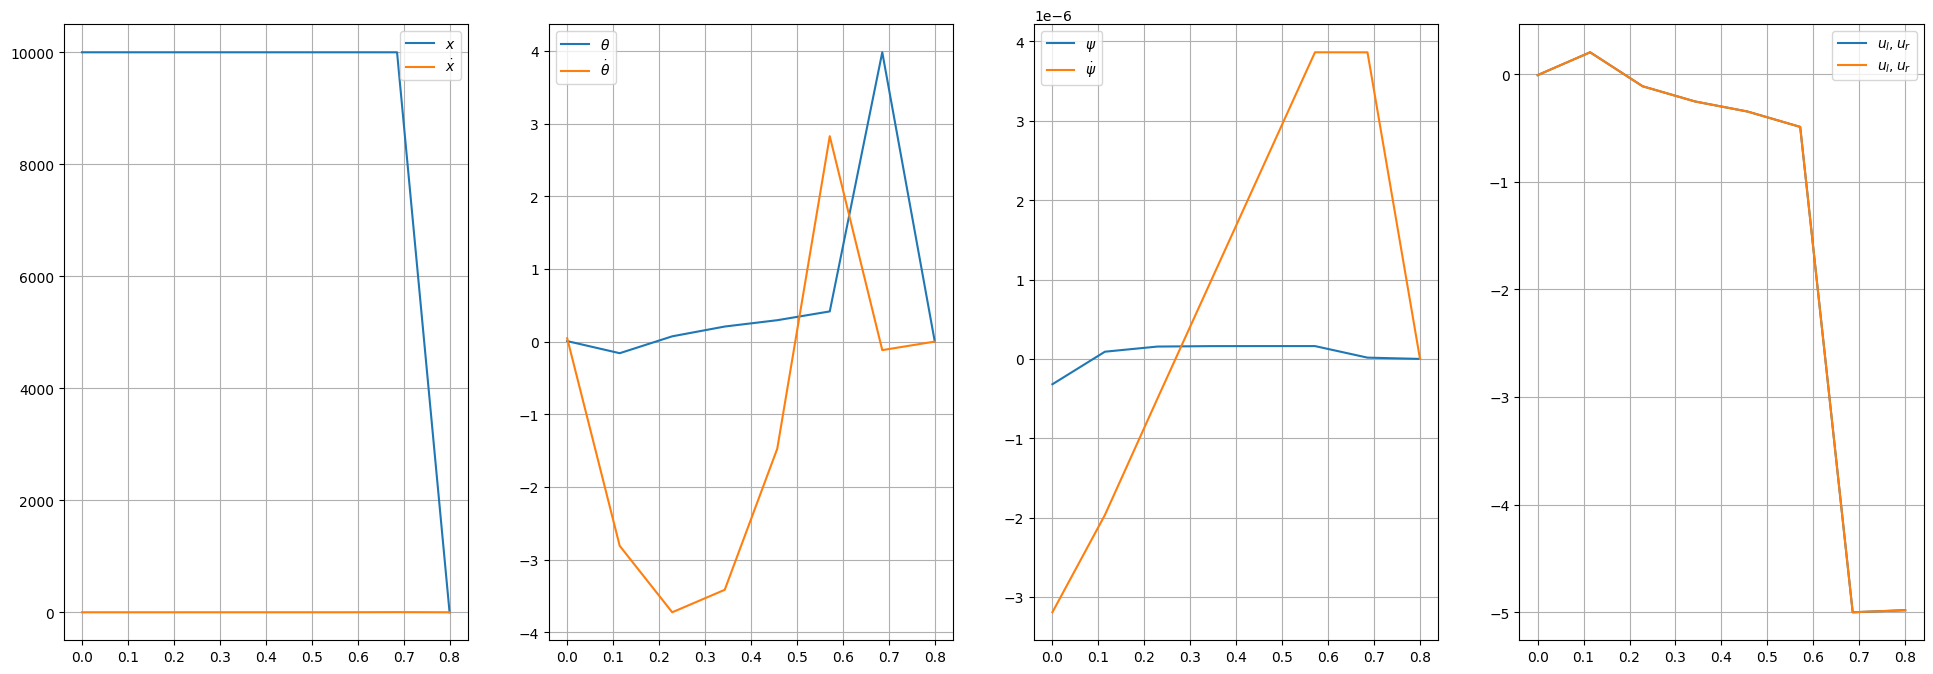

In [7]:
def plot_states(x_states_, u, t):

    plt.subplot(141)

    plt.plot(t, x_states_[:,0], label=r'$x$')
    plt.plot(t, x_states_[:,1], label=r'$\dot x$')
    plt.grid()
    plt.legend()


    plt.subplot(142)

    plt.plot(t, x_states_[:,2], label=r'$\theta$')
    plt.plot(t, x_states_[:,3], label=r'$\dot \theta$')
    plt.grid()
    plt.legend()


    plt.subplot(143)

    plt.plot(t, x_states_[:,4], label=r'$\psi$')
    plt.plot(t, x_states_[:,5], label=r'$\dot \psi$')
    plt.grid()
    plt.legend()


    plt.subplot(144)

    u_inputs = u[6:-1].reshape((-1,2))
    plt.plot(t, u_inputs, label=r'$u_l, u_r$')
    plt.grid()
    plt.legend()
    


plt.figure(figsize=(24,8))
plot_states(x_states, u, np.linspace(0, horizon*t, horizon))


Solution found!
[-2.61711565e-06  3.20047521e-05  4.91019521e-05  3.37815200e-04
  5.83347933e-07  5.83351389e-06] [ 0.00022936 -0.00035399]
Solution found!
[ 7.10621526e-05 -8.62819540e-04 -1.23943449e-03 -7.21981070e-03
  2.40226507e-06  1.81892510e-05] [0.00229586 0.00106027]
Solution found!
[-7.05211358e-04  8.54267704e-03  1.09841414e-02  4.29145090e-02
 -2.56456670e-05 -2.80479297e-04] [-0.0313618  -0.00149494]
Solution found!
[-1.00563743e-02  1.22562393e-01  2.06748936e-01  1.70648178e+00
 -5.39912107e-05 -2.83455063e-04] [-0.24313522 -0.24283768]
Solution found!
[-1.94454813e-02  2.78504067e-01  7.83505041e-01  1.09642780e+01
 -8.20789217e-05 -2.80877111e-04] [-0.51523649 -0.51549429]
Solution found!
[-2.89464235e-02  7.87713281e-01  2.58071530e+00  4.01388231e+01
 -1.10168712e-04 -2.80897900e-04] [-0.88931887 -0.88931679]
Solution found!
[-3.87958541e-02  2.41322888e+00  8.25729184e+00  1.32528688e+02
 -1.38246503e-04 -2.80777914e-04] [-2.11001206 -2.11002406]
Solution found!

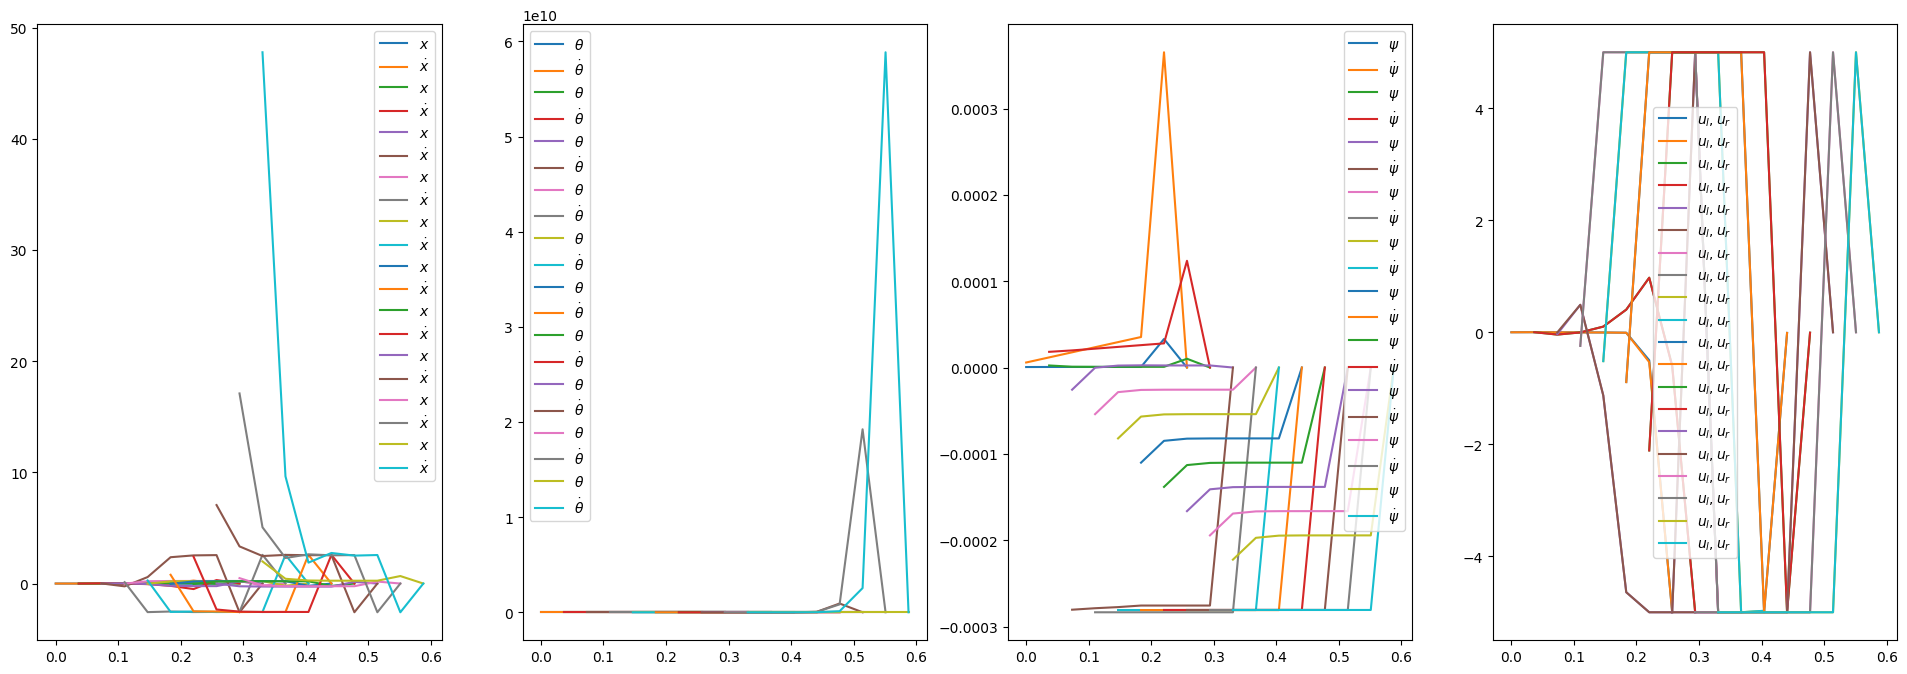

In [8]:
MAX = 10

x0 = np.array([0,0,0,0,0,0])
t = np.linspace(0, MAX+horizon)*t

plt.figure(figsize=(24,8))

for i in range(MAX):
    u = mpc.newMPC(x0, np.array([0,0,0,0,0,0]), horizon=8)
    x0 = (XH@u).reshape((-1,7))[0, 0:6]
    plot_states((XH@u).reshape((-1,7))[:, 0:6], u, t[i:i+horizon])
    print(x0, u[6:8])


In [31]:
class Sigi:
    t = 0.000000005
    def __init__(self, init_state = None) -> None:
        self.state = np.array([0,0,0,0,0,0]) if init_state is None else init_state
        self.A = np.array(
            [
                [0, 1,       0,      0,     0, 0],
                [0, -12.698, -1.926, 0.508, 0, 0],
                [0, 0,       0,      1,     0, 0],
                [0, 234.62,  96.094, 9.385, 0, 0],
                [0, 0,       0,      0,     0, 1],
                [0, 0,       0,      0,     0, 0],
            ]
        )
        cnst = 0.1
        self.B = np.array(
        [
            [0,     0,     0, 0, 0, 0],
            [2.1,   2.1,   0, 0, 0, 0],
            [0,     0,     0, 0, 0, 0],
            [-39.4, -39.4, 0, 0, 0, 0],
            [0,     0,     0, 0, 0, 0],
            [cnst,  -cnst, 0, 0, 0, 0],
        ]
    )                                               # x dot = A*x+B*u
        self.I = np.eye(6)
        self.I_TA = self.I + self.t*self.A
        self.TB = self.t*self.B[:,0:2]

    def update(self, u):
        self.state = self.I_TA@self.state + self.TB@u
        # self.state[2::2] = np.clip(self.state[2::2], -np.pi, np.pi)
        return self.state




In [32]:
s1 = Sigi(np.array([0,0,0,0,0,0]))
s2 = Sigi(np.array([0.1,0,0,0,0,1]))
s3 = Sigi(np.array([0,1,0,0,0,0]))
s4 = Sigi(np.array([0,0,0.1,0,0,0]))
lsigis = [s1, s2, s3, s4]


In [33]:
plots = [[]]

for s in lsigis:
    plots[0].append(s.state)

for i in tqdm.tqdm(range(int(1/Sigi.t))):
    plots.append([])
    for s in lsigis:
        s.update(np.array([0,0]))
        plots[-1].append(s.state)

plots = np.array(plots)
plt.figure(figsize=(6*len(lsigis), 18))
for i in range(len(lsigis)):
    plt.subplot(len(lsigis), 3, i*3+1)
    plt.plot(plots[:,i,0], label=r'$x$')
    plt.plot(plots[:,i,1], label=r'$\dot x$')
    plt.grid()
    plt.legend()

    plt.subplot(len(lsigis), 3, i*3+2)
    plt.plot(plots[:,i,2], label=r'$\theta$')
    plt.plot(plots[:,i,3], label=r'$\dot \theta$')
    plt.grid()
    plt.legend()

    plt.subplot(len(lsigis), 3, i*3+3)
    plt.plot(plots[:,i,4], label=r'$\psi$')
    plt.plot(plots[:,i,5], label=r'$\dot \psi$')
    plt.grid()
    plt.legend()

# print("in this order: x, x dot, theta, theta dot, psi, psi dot")
# plt.plot(t, x_states_[:,0], label=r'$x$')
# plt.plot(t, x_states_[:,1], label=r'$\dot x$')


  0%|          | 0/200000000 [00:00<?, ?it/s]

  2%|▏         | 4379421/200000000 [04:25<6:23:50, 8493.93it/s] 

In [12]:
#### System Dynamics
# Initial Conditions
# IC_P = np.array([-np.pi,0])

Ts = 0.1
IC_P = np.array([-0.26,0])
A = np.array([[1, Ts], [0, 1]])
B = np.array([[0.5*Ts**2], [Ts]])

## Reachability problem for horizon H=1
H=14 # horizon starts at 0
SAT = 5
umax = SAT
umin = -SAT


Horizon 14
Construction of Optim. Problem: 0.042762041091918945 [s]
Solving of Optim. Problem: 0.22777962684631348 [s]
(15,)


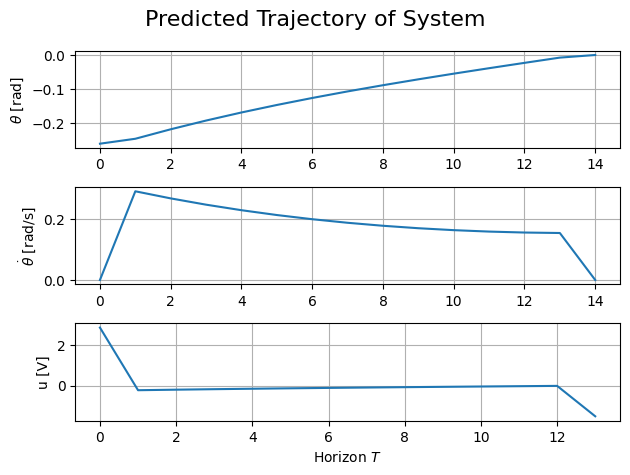

In [13]:

import time
import cvxpy as cp

t0 = time.time()

SAT = 60
umax = SAT
umin = -SAT

n = 2
m = 1

Q = np.eye(n)*10
R = np.eye(m)*0

# Varibles for the entire horizon
x = cp.Variable((n, H + 1))
u = cp.Variable((m, H))

cost = 0
cons = []
# Set constraints
for i in range(H):
    cost += cp.quad_form(x[:, i], Q) + cp.quad_form(u[:, i], R)
    cons += [x[:, i + 1] == A@x[:, i] + B@u[:, i], u[:, i]<=umax, u[:, i]>=umin]
    cons += [x[:, i + 1] == A@x[:, i] + B@u[:, i]]


# Start and end constraints
cons += [x[:, H] == 0, x[:, 0] == IC_P]
prob = cp.Problem(cp.Minimize(cost), cons)

t1 = time.time()
sol = prob.solve()
tend = time.time()

construct_opt = t1-t0
solve_opt = tend-t1


print(f'Horizon {H}')
print(f'Construction of Optim. Problem: {construct_opt} [s]')
print(f'Solving of Optim. Problem: {solve_opt} [s]')


## TEST MPC on one time step
if prob.status == cp.OPTIMAL:
    fig = plt.figure()
    fig.suptitle('Predicted Trajectory of System', fontsize=16)

    ax1 = fig.add_subplot(3, 1, 1)
    x1 = x[0, :].value
    print(x1.shape)
    ax1.plot(x1)
    ax1.set_ylabel(r"$\theta$ [rad]")
    ax1.grid()

    ax2 = fig.add_subplot(3, 1, 2)
    x2 = x[1, :].value
    ax2.plot(range(H+1), x2)
    ax2.set_ylabel(r"$\dot\theta$ [rad/s]")
    ax2.grid()

    ax2 = fig.add_subplot(3, 1, 3)
    ax2.plot(range(H), u.value.reshape(-1))
    ax2.set_ylabel(r"u [V]")
    ax2.set_xlabel(r"Horizon $T$")
    ax2.grid()

    fig.tight_layout()
    plt.show()
else:
    print("Problem is infeasible")
